# Business Case: Aerofit - Descriptive Statistics & Probability

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# PROBLEM STATEMENT

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1 . Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2 . For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Import important python libraries for analysis 

In [1]:
import numpy as np   #for numbers 
import pandas as pd   # for dataframe and loading of data 
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns # for statistical visualization 

In [2]:
df = pd.read_csv("aerofit_treadmill (1).txt")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Lets first explore the data 

In [3]:
df.shape                     # Dataset is very small it has only 180 rows and 9 columns 

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Lets check if dataset contains any null or nan values? 

In [5]:
df.isna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

We can clearly see for the above that our dataset does not contains any null or nan values. 

Its time to check the unique values. 

In [8]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP781    48   Male    18         Partnered      4      5        95508   180      1
KP281    36   Male    12         Single         4      3        44343   94       1
         35   Female  18         Single         3      3        67083   85       1
                      16         Partnered      3      3        60261   94       1
         34   Male    16         Single         4      5        51165   169      1
                                                                                ..
KP481    32   Male    16         Partnered      3      3        53439   95       1
         31   Male    16         Partnered      3      3        52302   95       1
              Female  18         Single         2      1        65220   21       1
                      16         Partnered      2      3        51165   64       1
KP281    18   Male    14         Single         3      4        29562   112      1
Length: 1

In [10]:
ans = df.copy()           # Made a copy of the dataset for the safe side 

In [11]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Inferences 
.Dataset has no null values.

.There are 3 unique Products in the dataset.

.The most frequent product is "KP281".

.Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.

.Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.

.The maximum income is 104581 and the minimum income is 29562.

.Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [12]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Its time to understand the Quantitative variables 
Age , Education , Usage , Fitness , Income , Miles  

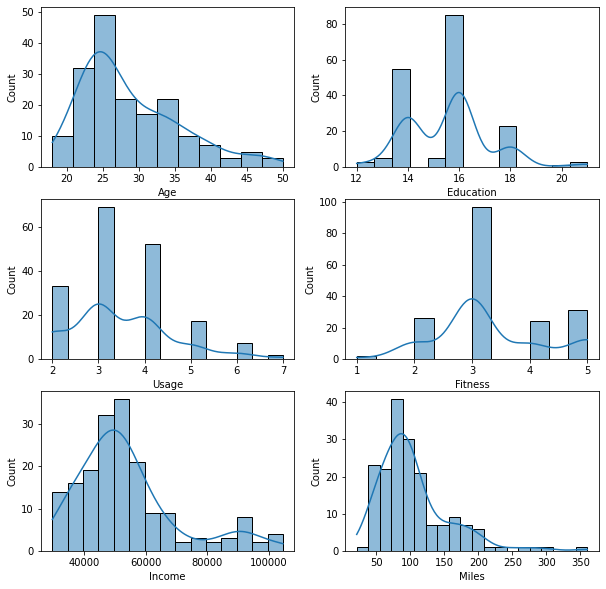

In [13]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Time to check the outliers by plotting boxplot and will see that which quantitative variable contains more number of outliers.

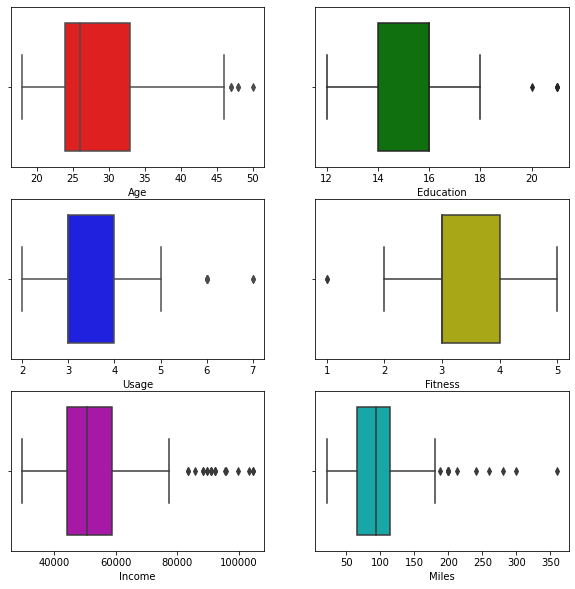

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

sns.boxplot(data=df, x=df["Age"], ax=axis[0,0] , color="r")
sns.boxplot(data=df, x=df["Education"],ax=axis[0,1] , color= "g")
sns.boxplot(data=df, x=df["Usage"], ax=axis[1,0] , color = "b")
sns.boxplot(data=df, x=df["Fitness"], ax=axis[1,1] , color = "y")
sns.boxplot(data=df, x=df["Income"], ax=axis[2,0] , color = "m")
sns.boxplot(data=df, x=df["Miles"], ax=axis[2,1] , color = "c")
plt.show()

# Observations

. It is clearly showing that Income and Miles have more number of outliers as campared to age , usage , fitness and Education.



# Lets check the Qualitative variables 
1 . Product 
2 . Gender 
3 . Martialstatus 

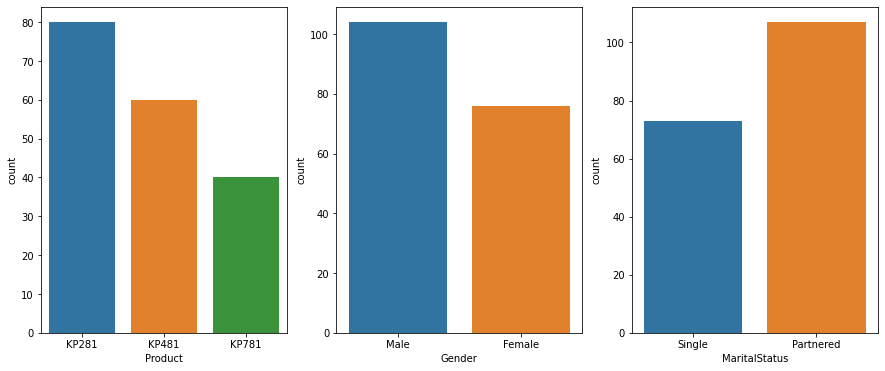

In [15]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.countplot(data=df, x='Product', ax=axis[0])
sns.countplot(data=df, x='Gender', ax=axis[1])
sns.countplot(data=df, x='MaritalStatus', ax=axis[2])
plt.show()

In [16]:
df["Product"].value_counts()/len(df)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [17]:
df["Gender"].value_counts()/len(df)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [18]:
df["MaritalStatus"].value_counts()/len(df)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

# Observations 
1 . KP281 is the most frequent product 

2 . Count of Males are more as compared to Females 

3 . Count of Singles are less as campared to Partnered

4 . 44.44% customers have purchased KP281 , 33.33% customers have purchases KP481 , 22.22% customers have purchased KP781

5 . 57.77% of the customers are Male

6 . 59.44% of the customers are Partnered

# Bivariate Analysis 

Lets see that what are the impacts of Gender and MartialStatus on the Product. 

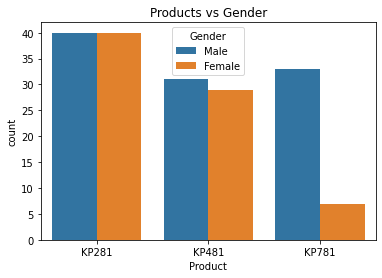

In [19]:
sns.countplot(data = df , x = df["Product"] , hue = "Gender")
plt.title("Products vs Gender")
plt.show()

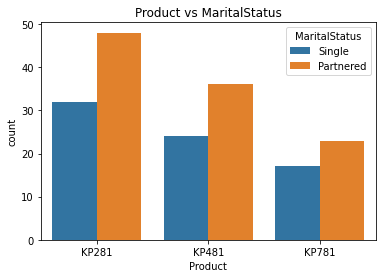

In [20]:
sns.countplot(data = df , x = df["Product"] , hue = "MaritalStatus")
plt.title("Product vs MaritalStatus")
plt.show()

# Observations

1 . Equal number of males and females purchased the product KP281.However, males are the dominant in all the three products(Prducts vs Gender).

2 . Customer who is Partnered, is more likely to purchase the product.

Lets check for the quantitative variables have any affect on the purchased products.

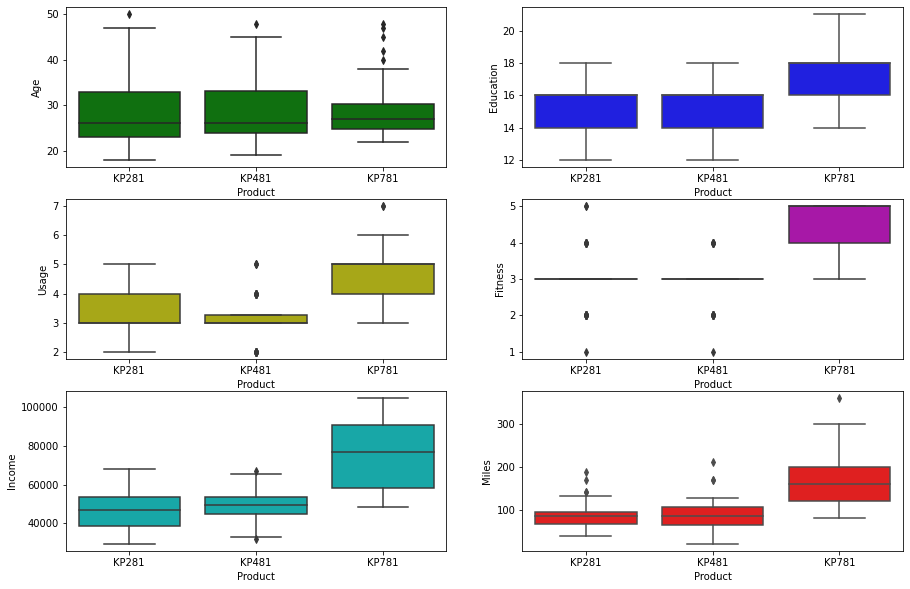

In [21]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.boxplot(data=df, x=df["Product"], y = df["Age"] , ax=axis[0,0] , color= "g")
sns.boxplot(data=df, x=df["Product"], y = df["Education"] , ax=axis[0,1] , color = "b")
sns.boxplot(data=df, x=df["Product"], y = df["Usage"],  ax=axis[1,0] , color = "y")
sns.boxplot(data=df, x=df["Product"], y = df["Fitness"] , ax=axis[1,1] , color = "m")
sns.boxplot(data=df, x=df["Product"], y = df["Income"],  ax=axis[2,0] , color = "c")
sns.boxplot(data = df , x = df["Product"] , y = df["Miles"], ax = axis[2,1] , color = "r")
plt.show()

# Observations

1 . In the first plot of Product vs Age, it is showin g that the median od KP281 and KP481 are equal.

2 . In the second plot of Product vs Education , it is showing that the five number summary is same for KP281 and KP481 and customers whose Education is greater than 16, have more chances to purchase the KP781 product.

3 . Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.

4 . The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

5 . Customers whose income greater than or equal to(income >= 6000) are likely to purchase KP781.

6 . If a customer anticipates to run/walk greater than 120 miles are likely to purchase KP781 product.

# Multivariate Analysis 

It is time to witness the effect of quantitative and qualitative variables on the Product. 

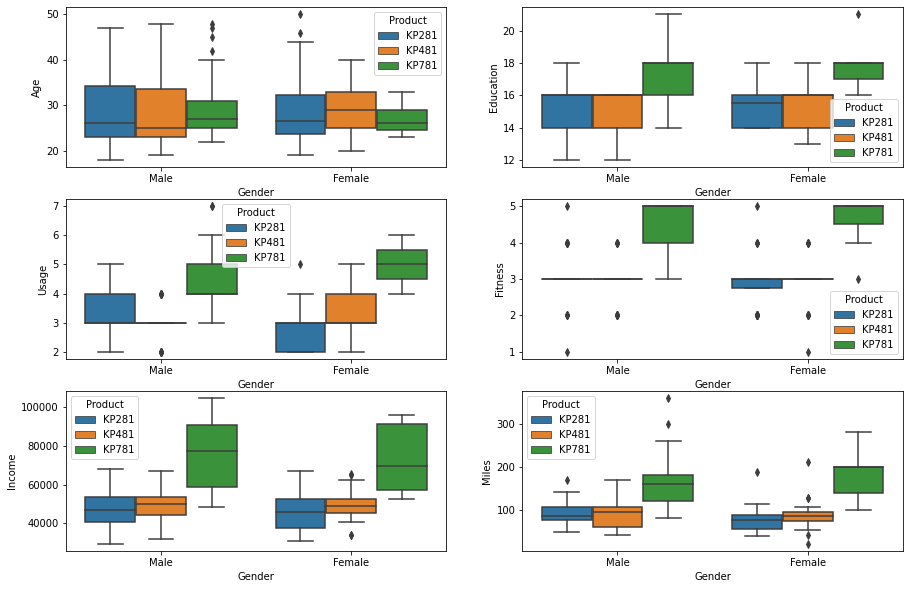

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.boxplot(data = df , x = df["Gender"] , y = df["Age"] , hue = "Product" , ax = axis[0,0])
sns.boxplot(data = df , x = df["Gender"] , y = df["Education"] , hue = "Product" , ax = axis[0,1])
sns.boxplot(data = df , x = df["Gender"] , y = df["Usage"] , hue = "Product" , ax = axis[1,0])
sns.boxplot(data = df , x = df["Gender"] , y = df["Fitness"] , hue = "Product" , ax = axis[1,1])
sns.boxplot(data = df , x = df["Gender"] , y = df["Income"] , hue = "Product" , ax = axis[2,0])
sns.boxplot(data = df , x = df["Gender"] , y = df["Miles"] , hue = "Product" , ax = axis[2,1])
plt.show()

# Observations 

1 . Females who are planning to do exercise 3-4 times in a week are likely to purchase KP481. 

2 . Males and females whose annual (income >= 60000) are planning to purchase KP781 modwl.

3 . Females who go for a walk/run between 125 to 200 miles each weel are likely to purchase KP781.

In [23]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Marginal and Conditional probablities 

In [24]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [25]:
df["Product"].value_counts(normalize= True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

44.44 % of the customers purchased KP281 , 33.33% have purchased KP481 and 22.22% have purchased KP781. 


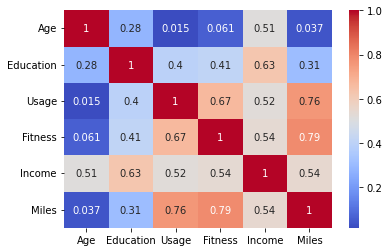

In [26]:
sns.heatmap(df.corr() , cmap = "coolwarm" , annot = True) 
plt.show()

Firstly, we need to find the probablities of males and females and after that we will find the probalities of each product given that males and females and this process is called conditional probablity.

In [27]:
df["Gender"].value_counts(normalize = True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

The probablities of males and females are 0.58 and 0.43. 

In [28]:
df["Product"].value_counts(normalize  = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [29]:
def p_of_product_given_gender(gender, print_marginal=False):
     
    data1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_kp781 = data1['KP781'][gender] / data1.loc[gender].sum()
    p_kp481 = data1['KP481'][gender] / data1.loc[gender].sum()
    p_kp281 = data1['KP281'][gender] / data1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {data1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {data1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_kp781:.2f}")
    print(f"P(KP481/{gender}): {p_kp481:.2f}")
    print(f"P(KP281/{gender}): {p_kp281:.2f}\n")
    
p_of_product_given_gender('Male', True)
p_of_product_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [30]:

def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



# Recommendations 

1 . KP281 is the most frequent product and that means customere are more likely to purchase product KP281 and company should design more KP282 treadmill. 

2 . Since there are few customers who do workout 4 times in week have purchased KP781 as compared to other two products. However, company should track and take a survey of few people and calculate the average and by this they can design the product.

3 . Customers whose age is starts from 25 to 45 years old are more likely to use KP281 and KP481 instead of KP781. The recommendation will be that company should be designed more KP281 and KP481 models.

4 . Females used KP481 more instead of KP281 and KP781.

5 . It has been seen as well that the probablity of KP281 is more than others.

6 . 38% of the males have purchased KP281 than other products and 53% of the females have also purchased KP281 model.

7 . 44% of the singles and 45% of the partnered have purchased KP281 model. It means KP281 must be a cheap in price and more usable as campared to other models. Company should more produced KP281 model in order to grown the buisness. Users are more likely to buy KP281 model. 